In [1]:
!pip install mglearn
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import mglearn

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
df_filtered=pd.read_csv('df_filtered.csv',encoding='cp949')

In [4]:
df_filtered

,상품명,거래량,최근거래가,발매일,발매일로부터현재까지일,발매가,색상개수,최고거래가,최고거래성사일,최저거래가,...,브랜드_Adidas,브랜드_Asics,브랜드_Converse,브랜드_Jordan,브랜드_Mihara Yasuhiro,브랜드_New Balance,브랜드_Nike,브랜드_Puma,브랜드_Salomon,브랜드_Vans
0,나이키 V2K 런 라이트 오어우드 브라운 카키,4.748321,3.427711,2024-01-04,12.402237,3.959586,4,2.869657,2024-05-10,3.734096,...,0,0,0,0,0,0,1,0,0,0
1,나이키 에어 줌 알파플라이 넥스트% 3 볼트,4.753022,3.471594,2024-02-15,10.657562,4.006456,4,2.885397,2024-02-15,3.800698,...,0,0,0,0,0,0,1,0,0,0
2,(W) 나이키 에어포스 1 '07 WB 플랙스 위트,4.535706,3.445503,2023-12-18,13.006454,3.969553,3,2.876575,2024-03-18,3.746308,...,0,0,0,0,0,0,1,0,0,0
3,(W) 나이키 코르테즈 SE 밸런타인데이 세일 어도비,4.742146,3.432313,2024-02-14,10.704532,3.955055,4,2.869657,2024-02-02,3.727202,...,0,0,0,0,0,0,1,0,0,0
4,나이키 V2K 런 화이트 퍼,4.735441,3.433910,2023-09-08,15.900007,3.959586,4,2.870449,2024-02-22,3.712485,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,나이키 에어포스 1 '07 LV8 화이트 블랙 울프 그레이,4.290478,3.459225,2021-11-27,25.740766,3.942443,4,2.879860,2023-06-15,3.750450,...,0,0,0,0,0,0,1,0,0,0
1717,나이키 에어포스 1 '07 LV8 넥스트 네이쳐 라탄 세일 브라운 켈프,3.338150,3.445911,2021-11-05,25.969419,3.968846,2,2.870449,2021-12-20,3.720837,...,0,0,0,0,0,0,1,0,0,0
1718,나이키 블레이저 미드 '77 점보 다크 러셋,2.754610,3.428090,2021-11-04,25.979726,3.955055,2,2.870449,2021-12-02,3.716376,...,0,0,0,0,0,0,1,0,0,0
1719,(W) 나이키 블레이저 미드 '77 LX 화이트 펜던트,2.689813,3.436583,2021-11-04,25.979726,3.959586,2,2.870525,2021-11-01,3.734731,...,0,0,0,0,0,0,1,0,0,0


# 모델링 과정

1. ['수익률', '발매일로부터현재까지일', '콜라보']
------
다양한 스케일러 별 k-means 사용시 베스트 모델

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.cluster import KMeans, MeanShift, DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 사용할 클러스터링 알고리즘들 및 하이퍼파라미터 범위
clustering_algorithms = {
    "KMeans": (KMeans(random_state=42), {"n_clusters": [3, 4, 5, 6]}),
}

# 사용할 스케일링 기법들
scaling_methods = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "Normalizer": Normalizer(norm='l2'),
    "LogTransform": np.log1p
}

# 클러스터링에 사용할 컬럼들 선택
columns_to_cluster = ['수익률', '발매일로부터현재까지일', '콜라보']

# 각 스케일링 방법을 적용하고 클러스터링
best_models = {}
best_silhouette_scores = {}

for scaler_name, scaler in scaling_methods.items():
    # 스케일링
    if scaler_name == "LogTransform":
        scaled_features = scaler(df_filtered[columns_to_cluster])
    else:
        scaled_features = scaler.fit_transform(df_filtered[columns_to_cluster])

    best_models[scaler_name] = {}
    best_silhouette_scores[scaler_name] = {}

    # 각 클러스터링 알고리즘을 순회하면서 적용
    for algo_name, (algorithm, params) in clustering_algorithms.items():
        try:
            grid_search = GridSearchCV(algorithm, params, scoring="neg_mean_squared_error", cv=5)
            grid_search.fit(scaled_features)
            best_model = grid_search.best_estimator_
            labels = best_model.fit_predict(scaled_features)

            # 유효한 클러스터링 결과인지 확인
            if len(set(labels)) > 1:
                silhouette_avg = silhouette_score(scaled_features, labels)
            else:
                silhouette_avg = -1  # 유효하지 않은 클러스터링 결과는 -1로 처리

            best_models[scaler_name][algo_name] = best_model
            best_silhouette_scores[scaler_name][algo_name] = silhouette_avg

            print(f"Best parameters for {algo_name} with {scaler_name}: {grid_search.best_params_}")
            print(f"Silhouette score for {algo_name} with {scaler_name}: {silhouette_avg}")
            print('----------------------------------------------------------')
        except Exception as e:
            print(f"An error occurred with {algo_name} and {scaler_name}: {e}")
            best_models[scaler_name][algo_name] = None
            best_silhouette_scores[scaler_name][algo_name] = -1

# 최적의 스케일링 방법과 클러스터링 알고리즘 찾기
best_scaler = None
best_algo = None
best_score = -1

for scaler_name, algo_scores in best_silhouette_scores.items():
    for algo_name, score in algo_scores.items():
        if score > best_score:
            best_score = score
            best_scaler = scaler_name
            best_algo = algo_name

print(f"\nBest combination is {best_scaler} with {best_algo}, achieving a silhouette score of {best_score}")

# 최적 조합에 대한 클러스터링 결과를 데이터프레임에 저장
if best_scaler == "LogTransform":
    best_scaled_features = scaling_methods[best_scaler](df_filtered[columns_to_cluster])
else:
    best_scaled_features = scaling_methods[best_scaler].fit_transform(df_filtered[columns_to_cluster])

if best_models[best_scaler][best_algo] is not None:
    df_filtered['best_cluster'] = best_models[best_scaler][best_algo].fit_predict(best_scaled_features)
else:
    print(f"No valid clustering found for {best_scaler} with {best_algo}")


Best parameters for KMeans with StandardScaler: {'n_clusters': 3}
Silhouette score for KMeans with StandardScaler: 0.36542160846410576
----------------------------------------------------------
Best parameters for KMeans with MinMaxScaler: {'n_clusters': 3}
Silhouette score for KMeans with MinMaxScaler: 0.41446350049428626
----------------------------------------------------------
Best parameters for KMeans with RobustScaler: {'n_clusters': 3}
Silhouette score for KMeans with RobustScaler: 0.30174124364947247
----------------------------------------------------------
Best parameters for KMeans with Normalizer: {'n_clusters': 3}
Silhouette score for KMeans with Normalizer: 0.5779821294843399
----------------------------------------------------------
An error occurred with KMeans and LogTransform: 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
---------

KMeans 모델에서 noramlizer 사용해 스케일링 진행시 최적의 모델 가짐
이때의 실루엣계수는 0.57798

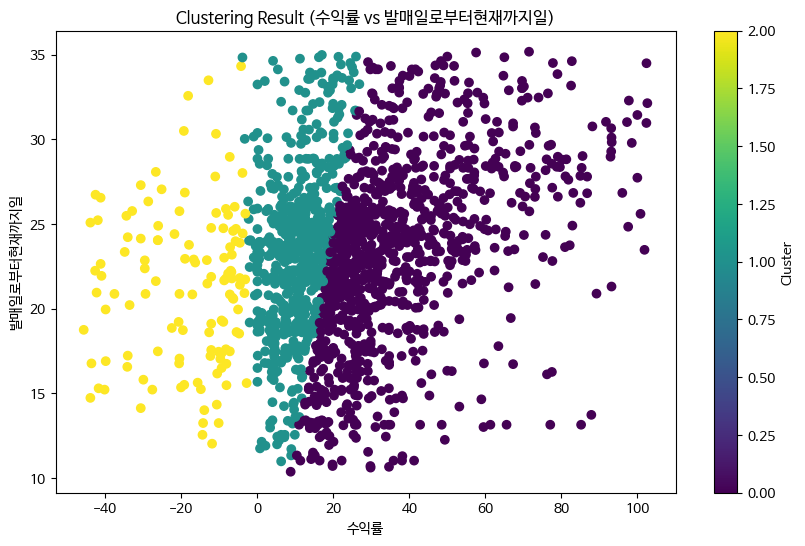

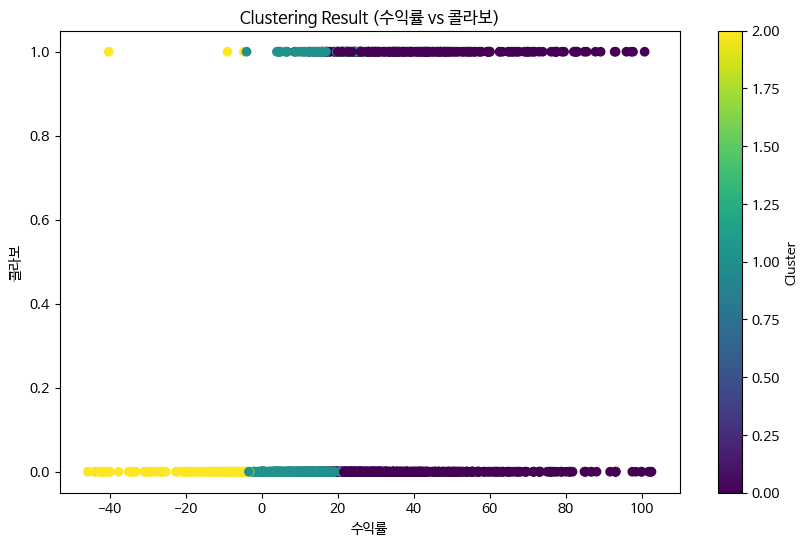

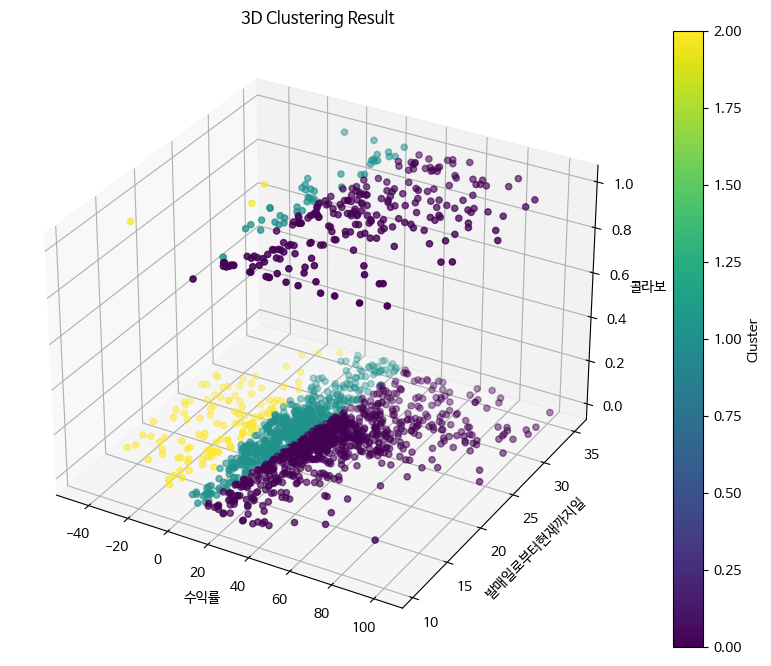

In [11]:
# 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

# 원본 데이터에 클러스터 레이블 추가
if best_models[best_scaler][best_algo] is not None:
    df_filtered['best_cluster'] = best_models[best_scaler][best_algo].fit_predict(best_scaled_features)
else:
    print(f"No valid clustering found for {best_scaler} with {best_algo}")

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['수익률'], df_filtered['발매일로부터현재까지일'], c=df_filtered['best_cluster'], cmap='viridis')
plt.xlabel('수익률')
plt.ylabel('발매일로부터현재까지일')
plt.title(f'Clustering Result (수익률 vs 발매일로부터현재까지일)')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['수익률'], df_filtered['콜라보'], c=df_filtered['best_cluster'], cmap='viridis')
plt.xlabel('수익률')
plt.ylabel('콜라보')
plt.title(f'Clustering Result (수익률 vs 콜라보)')
plt.colorbar(label='Cluster')
plt.show()

# 3D 시각화
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_filtered['수익률'], df_filtered['발매일로부터현재까지일'], df_filtered['콜라보'], c=df_filtered['best_cluster'], cmap='viridis')
ax.set_xlabel('수익률')
ax.set_ylabel('발매일로부터현재까지일')
ax.set_zlabel('콜라보')
plt.title(f'3D Clustering Result')
plt.colorbar(sc, label='Cluster')
plt.show()

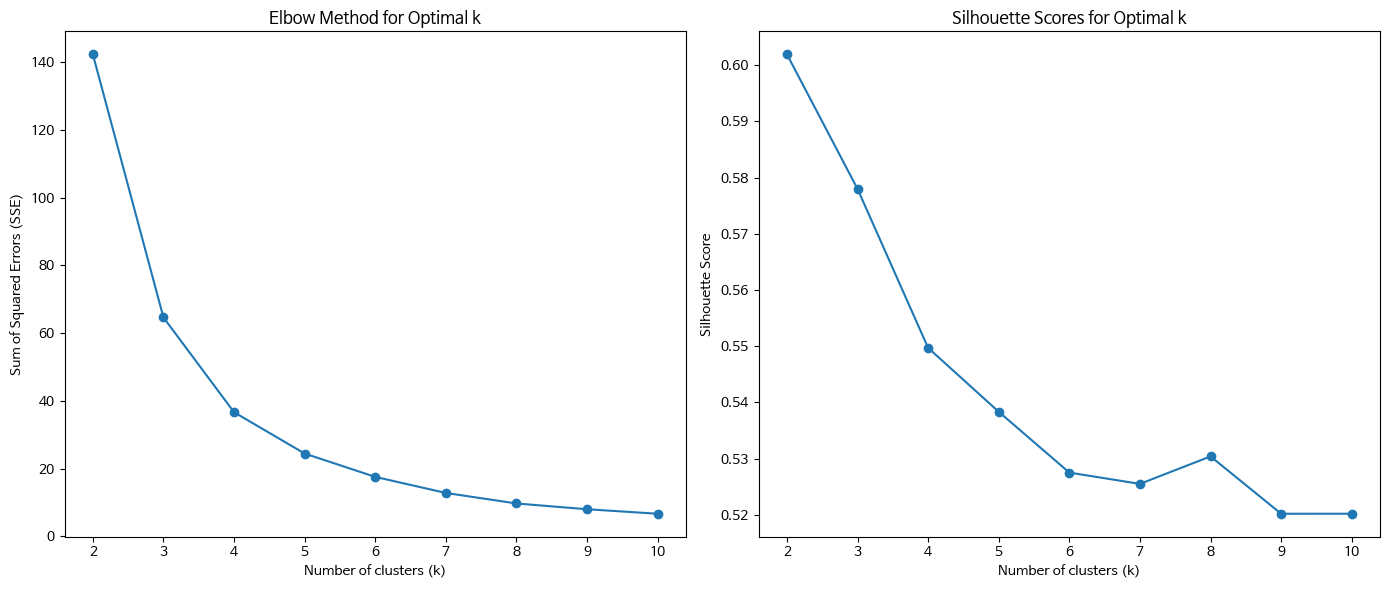

In [12]:
# 엘보우 방법을 사용하여 최적의 클러스터 개수를 찾기
sse = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(best_scaled_features)
    sse.append(kmeans.inertia_)  # inertia 값 계산 및 저장

    if len(set(kmeans.labels_)) > 1:  # 유효한 클러스터링 결과인지 확인
        silhouette_avg = silhouette_score(best_scaled_features, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(-1)  # 유효하지 않은 클러스터링 결과는 -1로 처리

# 엘보우 방법을 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal k')

plt.tight_layout()
plt.show()

엘보우 메소드와 실루엣계수 확인시 k=3 일때 가장 좋은 성능을 보임

군집 중심 확인

In [13]:
if best_algo == "KMeans" or best_algo == "MeanShift":
    centroids = best_models[best_scaler][best_algo].cluster_centers_
    print(f"Cluster centers for {best_algo}:")
    for idx, centroid in enumerate(centroids):
        print(f"Cluster {idx}:")
        for col_name, value in zip(columns_to_cluster, centroid):
            print(f"  {col_name}: {value}")

Cluster centers for KMeans:
Cluster 0:
  수익률: 0.8097800088016643
  발매일로부터현재까지일: 0.5620497517792804
  콜라보: 0.005183203516905851
Cluster 1:
  수익률: 0.38820890431343014
  발매일로부터현재까지일: 0.8992191038347714
  콜라보: 0.0024367232068037018
Cluster 2:
  수익률: -0.5733442530037742
  발매일로부터현재까지일: 0.7573128824231741
  콜라보: 0.000876074210563794


다양한 스케일러 별  KMeans, MeanShift, DBSCAN, AgglomerativeClustering 중 최적 모델 찾기

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.cluster import KMeans, MeanShift, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 사용할 클러스터링 알고리즘들 및 하이퍼파라미터 범위
clustering_algorithms = {
    "KMeans": (KMeans(random_state=42), {"n_clusters": [3, 4, 5, 6]}),
    "MeanShift": (MeanShift(), {"bandwidth": [2, 3, 4, 5]}),
    "DBSCAN": (DBSCAN(), {"eps": [0.3, 0.5, 0.7, 1.0], "min_samples": [3, 5, 7]}),
    "AgglomerativeClustering": (AgglomerativeClustering(), {"n_clusters": [3, 4, 5, 6], "linkage": ['ward', 'complete', 'average', 'single']})
}

# 사용할 스케일링 기법들
scaling_methods = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "Normalizer": Normalizer(norm='l2'),
    "LogTransform": np.log1p
}

# 클러스터링에 사용할 컬럼들 선택
columns_to_cluster = ['수익률', '발매일로부터현재까지일', '콜라보']

# 예시 데이터프레임 생성 (df_filtered가 이미 존재한다고 가정)
# df_filtered = pd.read_csv('your_data.csv')  # 실제 데이터 로드

# 각 스케일링 방법을 적용하고 클러스터링
best_models = {}
best_silhouette_scores = {}

for scaler_name, scaler in scaling_methods.items():
    # 스케일링
    try:
        if scaler_name == "LogTransform":
            scaled_features = scaler(df_filtered[columns_to_cluster])
        else:
            scaled_features = scaler.fit_transform(df_filtered[columns_to_cluster])

        best_models[scaler_name] = {}
        best_silhouette_scores[scaler_name] = {}

        # 각 클러스터링 알고리즘을 순회하면서 적용
        for algo_name, (algorithm, params) in clustering_algorithms.items():
            grid_search = GridSearchCV(algorithm, params, scoring="neg_mean_squared_error", cv=5)
            grid_search.fit(scaled_features)
            best_model = grid_search.best_estimator_
            labels = best_model.fit_predict(scaled_features)

            # 유효한 클러스터링 결과인지 확인
            if len(set(labels)) > 1:
                silhouette_avg = silhouette_score(scaled_features, labels)
            else:
                silhouette_avg = -1  # 유효하지 않은 클러스터링 결과는 -1로 처리

            best_models[scaler_name][algo_name] = best_model
            best_silhouette_scores[scaler_name][algo_name] = silhouette_avg

            print(f"Best parameters for {algo_name} with {scaler_name}: {grid_search.best_params_}")
            print(f"Silhouette score for {algo_name} with {scaler_name}: {silhouette_avg}")
            print('----------------------------------------------------------')
    except Exception as e:
        print(f"An error occurred with {scaler_name}: {e}")
        best_models[scaler_name] = None
        best_silhouette_scores[scaler_name] = -1

# 최적의 스케일링 방법과 클러스터링 알고리즘 찾기
best_scaler = None
best_algo = None
best_score = -1

for scaler_name, algo_scores in best_silhouette_scores.items():
    if isinstance(algo_scores, dict):
        for algo_name, score in algo_scores.items():
            if score > best_score:
                best_score = score
                best_scaler = scaler_name
                best_algo = algo_name

print(f"\nBest combination is {best_scaler} with {best_algo}, achieving a silhouette score of {best_score}")

# 최적 조합에 대한 클러스터링 결과를 데이터프레임에 저장
if best_scaler == "LogTransform":
    best_scaled_features = scaling_methods[best_scaler](df_filtered[columns_to_cluster])
else:
    best_scaled_features = scaling_methods[best_scaler].fit_transform(df_filtered[columns_to_cluster])

if best_models[best_scaler][best_algo] is not None:
    df_filtered['best_cluster'] = best_models[best_scaler][best_algo].fit_predict(best_scaled_features)
else:
    print(f"No valid clustering found for {best_scaler} with {best_algo}")


Best parameters for KMeans with StandardScaler: {'n_clusters': 3}
Silhouette score for KMeans with StandardScaler: 0.36542160846410576
----------------------------------------------------------
Best parameters for MeanShift with StandardScaler: {'bandwidth': 2}
Silhouette score for MeanShift with StandardScaler: 0.4626414480192626
----------------------------------------------------------
Best parameters for DBSCAN with StandardScaler: {'eps': 0.3, 'min_samples': 3}
Silhouette score for DBSCAN with StandardScaler: 0.07618904093474295
----------------------------------------------------------
Best parameters for AgglomerativeClustering with StandardScaler: {'linkage': 'ward', 'n_clusters': 3}
Silhouette score for AgglomerativeClustering with StandardScaler: 0.34501353437589205
----------------------------------------------------------
Best parameters for KMeans with MinMaxScaler: {'n_clusters': 3}
Silhouette score for KMeans with MinMaxScaler: 0.41446350049428626
-----------------------

모든 스케일링 별 모델 적용시 DBSCAN이 MinMaxScaler 사용시 가장 좋은 성능을 보임
이때의 실루엣계수는 0.6711 가짐
> [수익률,   발매일로부터현재까지일, 콜라보] 의 경우 DBSCAN 채택

In [19]:
# KMeans의 inertia와 실루엣 계수를 시각화 (elbow method 사용)
if best_algo == "KMeans":
    sse = []  # SSE (Sum of Squared Errors) 즉, inertia 값들을 저장할 리스트
    silhouette_scores = []  # 실루엣 계수를 저장할 리스트
    k_values = range(2, 11)  # 클러스터 개수 k의 범위를 2에서 10까지로 설정

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(best_scaled_features)
        sse.append(kmeans.inertia_)  # inertia 값 계산 및 저장

        if len(set(kmeans.labels_)) > 1:  # 유효한 클러스터링 결과인지 확인
            silhouette_avg = silhouette_score(best_scaled_features, kmeans.labels_)
            silhouette_scores.append(silhouette_avg)
        else:
            silhouette_scores.append(-1)  # 유효하지 않은 클러스터링 결과는 -1로 처리

    # 엘보우 방법을 시각화
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(k_values, sse, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('Elbow Method for Optimal k')

    plt.subplot(1, 2, 2)
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores for Optimal k')

    plt.tight_layout()
    plt.show()

# DBSCAN의 실루엣 계수를 시각화
if best_algo == "DBSCAN":
    db_params = best_models[best_scaler][best_algo].get_params()
    labels = best_models[best_scaler][best_algo].fit_predict(best_scaled_features)
    if len(set(labels)) > 1:  # 유효한 클러스터링 결과인지 확인
        silhouette_avg = silhouette_score(best_scaled_features, labels)
    else:
        silhouette_avg = -1  # 유효하지 않은 클러스터링 결과는 -1로 처리

    print(f"Best parameters for DBSCAN: {db_params}")
    print(f"Silhouette score for DBSCAN: {silhouette_avg}")
    print('----------------------------------------------------------')

Best parameters for DBSCAN: {'algorithm': 'auto', 'eps': 0.3, 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'min_samples': 3, 'n_jobs': None, 'p': None}
Silhouette score for DBSCAN: 0.6711069526871851
----------------------------------------------------------


결과 : cluster 2개로 나뉨

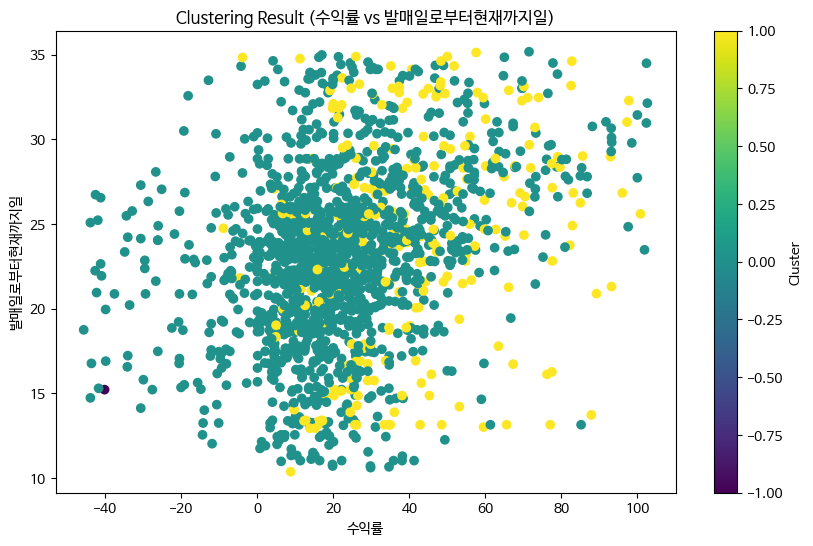

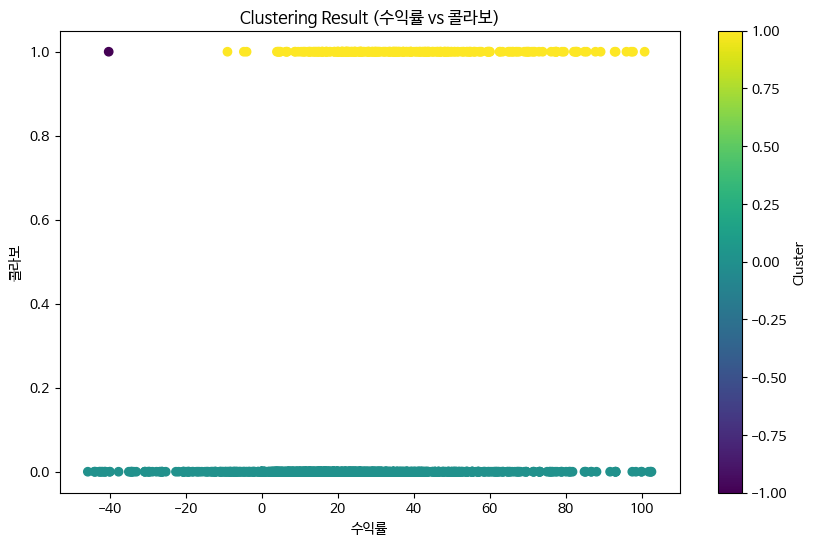

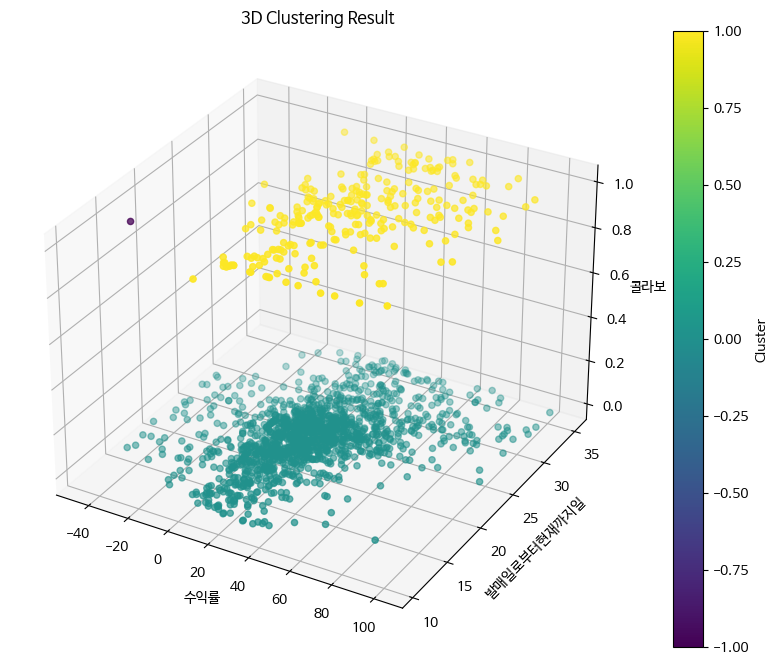

In [18]:
# 원본 데이터에 클러스터 레이블 추가
if best_models[best_scaler][best_algo] is not None:
    df_filtered['best_cluster'] = best_models[best_scaler][best_algo].fit_predict(best_scaled_features)
else:
    print(f"No valid clustering found for {best_scaler} with {best_algo}")

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['수익률'], df_filtered['발매일로부터현재까지일'], c=df_filtered['best_cluster'], cmap='viridis')
plt.xlabel('수익률')
plt.ylabel('발매일로부터현재까지일')
plt.title(f'Clustering Result (수익률 vs 발매일로부터현재까지일)')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['수익률'], df_filtered['콜라보'], c=df_filtered['best_cluster'], cmap='viridis')
plt.xlabel('수익률')
plt.ylabel('콜라보')
plt.title(f'Clustering Result (수익률 vs 콜라보)')
plt.colorbar(label='Cluster')
plt.show()

# 3D 시각화
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_filtered['수익률'], df_filtered['발매일로부터현재까지일'], df_filtered['콜라보'], c=df_filtered['best_cluster'], cmap='viridis')
ax.set_xlabel('수익률')
ax.set_ylabel('발매일로부터현재까지일')
ax.set_zlabel('콜라보')
plt.title(f'3D Clustering Result')
plt.colorbar(sc, label='Cluster')
plt.show()


최적 모델의 DBSCAN의 경우 2개의 클러스터로 나뉘고 결과 해석하기 어렵다고 판단

2. [수익률, 관심, 브랜드]
다양한 스케일링 별 베스트 모델 찾기

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.cluster import KMeans, MeanShift, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 사용할 클러스터링 알고리즘들 및 하이퍼파라미터 범위
clustering_algorithms = {
    "KMeans": (KMeans(random_state=42), {"n_clusters": [3, 4, 5, 6]}),
    "MeanShift": (MeanShift(), {"bandwidth": [2, 3, 4, 5]}),
    "DBSCAN": (DBSCAN(), {"eps": [0.3, 0.5, 0.7, 1.0], "min_samples": [3, 5, 7]}),
    "AgglomerativeClustering": (AgglomerativeClustering(), {"n_clusters": [3, 4, 5, 6], "linkage": ['ward', 'complete', 'average', 'single']})
}

# 사용할 스케일링 기법들
scaling_methods = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "Normalizer": Normalizer(norm='l2'),
    "LogTransform": np.log1p
}

# 클러스터링에 사용할 컬럼들 선택
columns_to_cluster = ['수익률', '관심']  # 숫자형 컬럼들
one_hot_columns = [col for col in df_filtered.columns if '브랜드' in col]  # 원핫인코딩된 브랜드 컬럼들
columns_to_cluster.extend(one_hot_columns)

# 각 스케일링 방법을 적용하고 클러스터링
best_models = {}
best_silhouette_scores = {}

for scaler_name, scaler in scaling_methods.items():
    # 스케일링
    try:
        if scaler_name == "LogTransform":
            scaled_features = scaler(df_filtered[columns_to_cluster])
        else:
            scaled_features = scaler.fit_transform(df_filtered[columns_to_cluster])

        best_models[scaler_name] = {}
        best_silhouette_scores[scaler_name] = {}

        # 각 클러스터링 알고리즘을 순회하면서 적용
        for algo_name, (algorithm, params) in clustering_algorithms.items():
            grid_search = GridSearchCV(algorithm, params, scoring="neg_mean_squared_error", cv=5)
            grid_search.fit(scaled_features)
            best_model = grid_search.best_estimator_
            labels = best_model.fit_predict(scaled_features)

            # 유효한 클러스터링 결과인지 확인
            if len(set(labels)) > 1:
                silhouette_avg = silhouette_score(scaled_features, labels)
            else:
                silhouette_avg = -1  # 유효하지 않은 클러스터링 결과는 -1로 처리

            best_models[scaler_name][algo_name] = best_model
            best_silhouette_scores[scaler_name][algo_name] = silhouette_avg

            print(f"Best parameters for {algo_name} with {scaler_name}: {grid_search.best_params_}")
            print(f"Silhouette score for {algo_name} with {scaler_name}: {silhouette_avg}")
            print('----------------------------------------------------------')
    except Exception as e:
        print(f"An error occurred with {scaler_name}: {e}")
        best_models[scaler_name] = None
        best_silhouette_scores[scaler_name] = -1

# 최적의 스케일링 방법과 클러스터링 알고리즘 찾기
best_scaler = None
best_algo = None
best_score = -1

for scaler_name, algo_scores in best_silhouette_scores.items():
    if isinstance(algo_scores, dict):
        for algo_name, score in algo_scores.items():
            if score > best_score:
                best_score = score
                best_scaler = scaler_name
                best_algo = algo_name

print(f"\nBest combination is {best_scaler} with {best_algo}, achieving a silhouette score of {best_score}")

# 최적 조합에 대한 클러스터링 결과를 데이터프레임에 저장
if best_scaler == "LogTransform":
    best_scaled_features = scaling_methods[best_scaler](df_filtered[columns_to_cluster])
else:
    best_scaled_features = scaling_methods[best_scaler].fit_transform(df_filtered[columns_to_cluster])

if best_models[best_scaler][best_algo] is not None:
    df_filtered['best_cluster'] = best_models[best_scaler][best_algo].fit_predict(best_scaled_features)
else:
    print(f"No valid clustering found for {best_scaler} with {best_algo}")

Best parameters for KMeans with StandardScaler: {'n_clusters': 3}
Silhouette score for KMeans with StandardScaler: 0.3841448231397064
----------------------------------------------------------
Best parameters for MeanShift with StandardScaler: {'bandwidth': 2}
Silhouette score for MeanShift with StandardScaler: -1
----------------------------------------------------------
Best parameters for DBSCAN with StandardScaler: {'eps': 0.3, 'min_samples': 3}
Silhouette score for DBSCAN with StandardScaler: 0.25848843632039936
----------------------------------------------------------
Best parameters for AgglomerativeClustering with StandardScaler: {'linkage': 'ward', 'n_clusters': 3}
Silhouette score for AgglomerativeClustering with StandardScaler: 0.29141299793808645
----------------------------------------------------------
Best parameters for KMeans with MinMaxScaler: {'n_clusters': 3}
Silhouette score for KMeans with MinMaxScaler: 0.35844224318230883
----------------------------------------

AgglomerativeClustering과 normalizer 스케일링 사용, linkage = 'ward', n_clusters=3 일때 0.6673의 실루엣 계수로 최적 모델로 선정


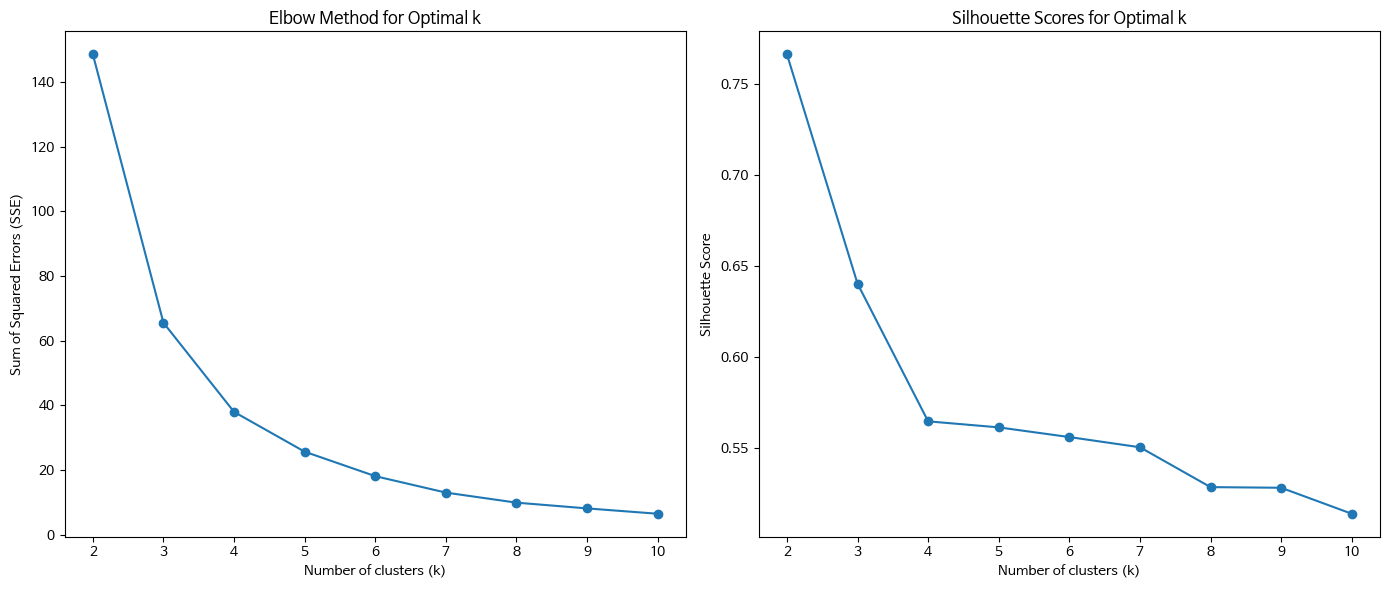

In [21]:
sse = []  # SSE (Sum of Squared Errors) 즉, inertia 값들을 저장할 리스트
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(best_scaled_features)
    sse.append(kmeans.inertia_)  # inertia 값 계산 및 저장

    if len(set(kmeans.labels_)) > 1:  # 유효한 클러스터링 결과인지 확인
        silhouette_avg = silhouette_score(best_scaled_features, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(-1)  # 유효하지 않은 클러스터링 결과는 -1로 처리

# 엘보우 방법을 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal k')

plt.tight_layout()
plt.show()


k-means 사용 시의 n_clusters = 3 으로 판단

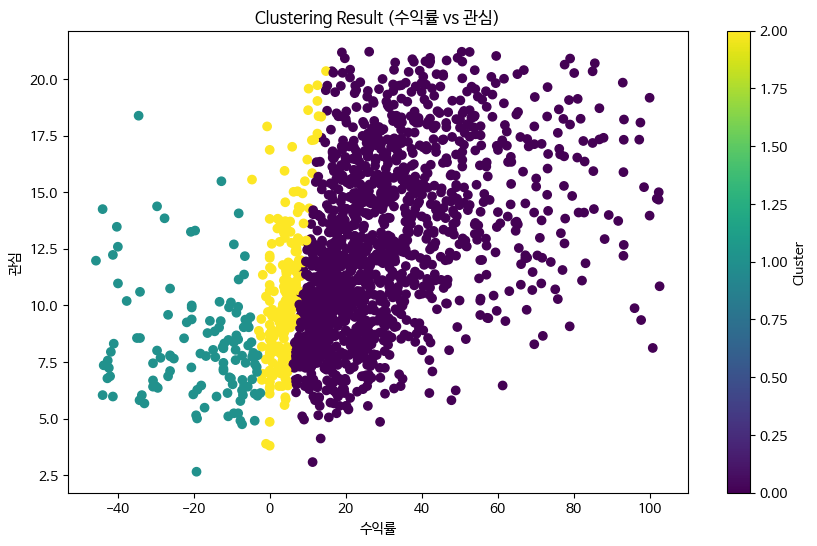

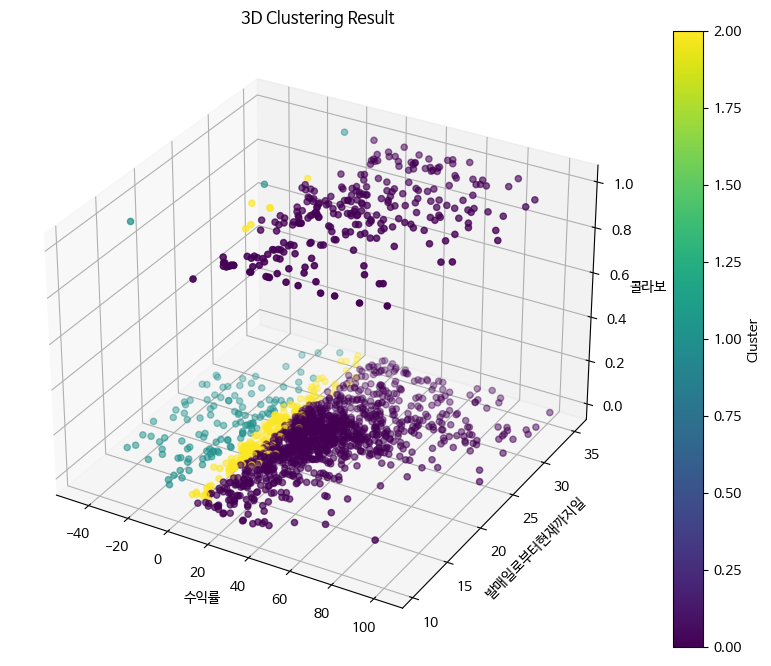

In [26]:
# 원본 데이터에 클러스터 레이블 추가
if best_models[best_scaler][best_algo] is not None:
    df_filtered['best_cluster'] = best_models[best_scaler][best_algo].fit_predict(best_scaled_features)
else:
    print(f"No valid clustering found for {best_scaler} with {best_algo}")

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['수익률'], df_filtered['관심'], c=df_filtered['best_cluster'], cmap='viridis')
plt.xlabel('수익률')
plt.ylabel('관심')
plt.title(f'Clustering Result (수익률 vs 관심)')
plt.colorbar(label='Cluster')
plt.show()

# 3D 시각화
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_filtered['수익률'], df_filtered['발매일로부터현재까지일'], df_filtered['콜라보'], c=df_filtered['best_cluster'], cmap='viridis')
ax.set_xlabel('수익률')
ax.set_ylabel('발매일로부터현재까지일')
ax.set_zlabel('콜라보')
plt.title(f'3D Clustering Result')
plt.colorbar(sc, label='Cluster')
plt.show()




군집 분석 결과 3개의 클러스터로 나뉘는 양상을 관찰함
1. 투자 비추천

 cluster 2

 낮은 수익률, 관심 수 적음, 콜라보 아닌 모델
---------------------------------------------
2. 투자 추천

 cluster 1

 보통 수익률, 관심 수 보통, 콜라보인 모델 적음
---------------------------------------------
3. 투자 매우 추천

 cluster 0

 큰 수익률, 관심 수 많음, 콜라보인 모델 다수

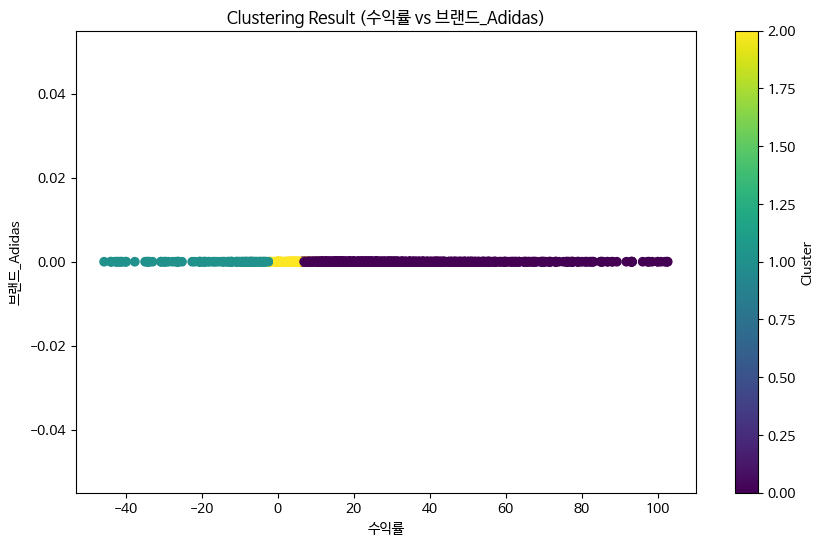

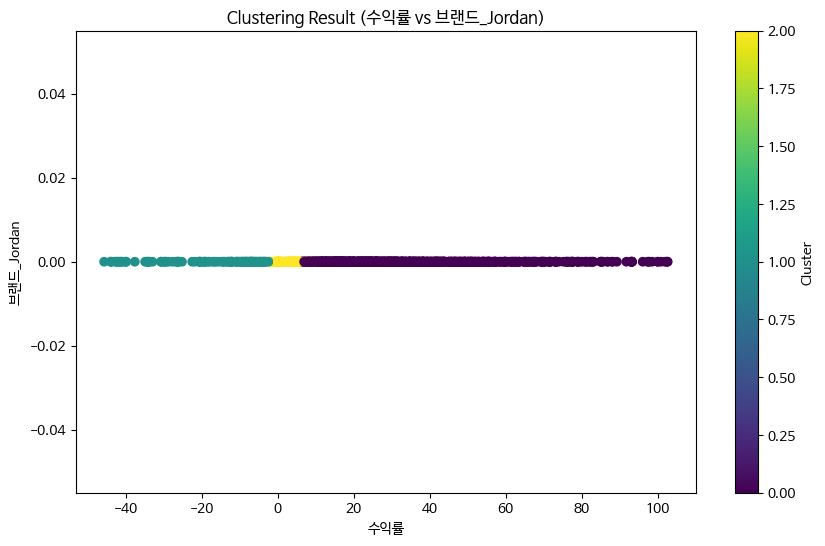

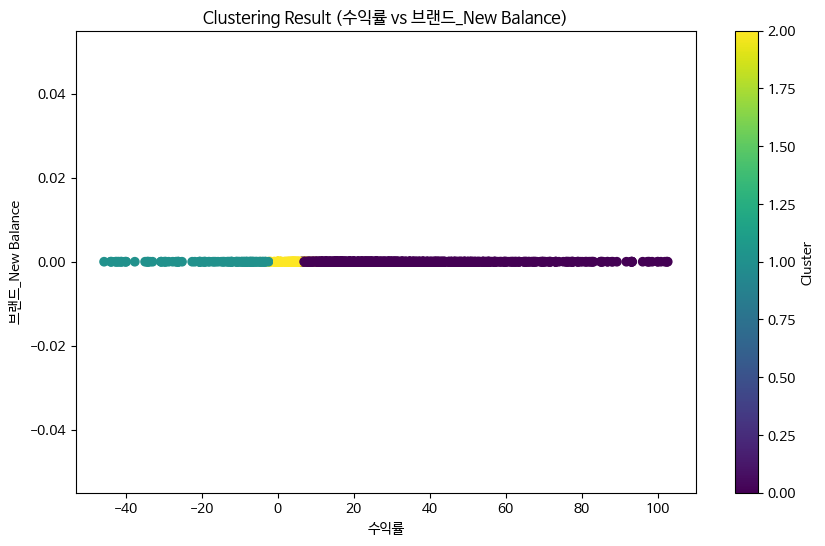

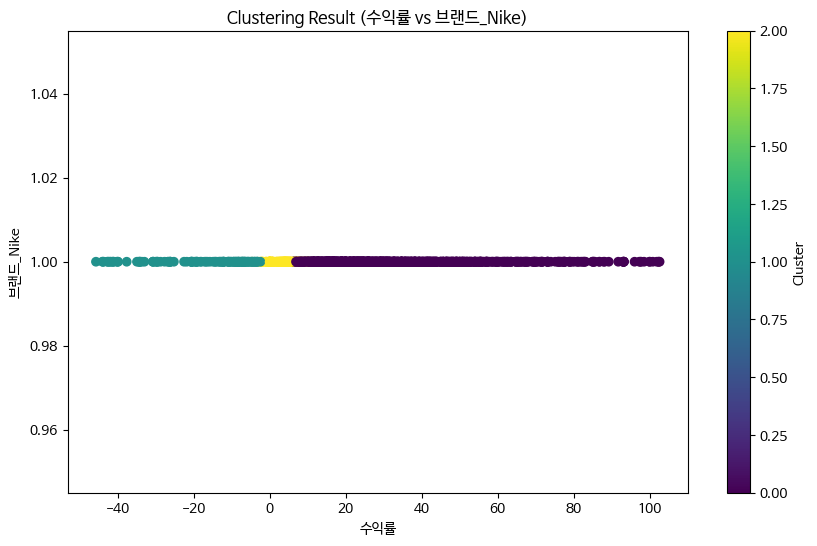

In [27]:
# 클러스터링 결과를 스케일링 이전의 데이터프레임에 추가
df_filtered['best_cluster'] = best_models[best_scaler][best_algo].fit_predict(best_scaled_features)

# 2차원 시각화 (수익률 vs 브랜드 종류별 원핫 컬럼)
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['수익률'], df_filtered[one_hot_columns[0]], c=df_filtered['best_cluster'], cmap='viridis')
plt.xlabel('수익률')
plt.ylabel(one_hot_columns[0])
plt.title(f'Clustering Result (수익률 vs {one_hot_columns[0]})')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['수익률'], df_filtered[one_hot_columns[3]], c=df_filtered['best_cluster'], cmap='viridis')
plt.xlabel('수익률')
plt.ylabel(one_hot_columns[3])
plt.title(f'Clustering Result (수익률 vs {one_hot_columns[3]})')
plt.colorbar(label='Cluster')
plt.show()

# 2차원 시각화 (수익률 vs 첫 번째 브랜드 원핫 컬럼)
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['수익률'], df_filtered[one_hot_columns[5]], c=df_filtered['best_cluster'], cmap='viridis')
plt.xlabel('수익률')
plt.ylabel(one_hot_columns[5])
plt.title(f'Clustering Result (수익률 vs {one_hot_columns[5]})')
plt.colorbar(label='Cluster')
plt.show()

# 2차원 시각화 (수익률 vs 첫 번째 브랜드 원핫 컬럼)
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['수익률'], df_filtered[one_hot_columns[6]], c=df_filtered['best_cluster'], cmap='viridis')
plt.xlabel('수익률')
plt.ylabel(one_hot_columns[6])
plt.title(f'Clustering Result (수익률 vs {one_hot_columns[6]})')
plt.colorbar(label='Cluster')
plt.show()


나이키의 영향이 매우 큼 > 데이터 자체가 나이키에 편향되어 있음

각 클러스터 중심 요소 확인

In [25]:
if best_algo == "KMeans" or best_algo == "MeanShift":
    centroids = best_models[best_scaler][best_algo].cluster_centers_
    print(f"Cluster centers for {best_algo}:")
    for idx, centroid in enumerate(centroids):
        print(f"Cluster {idx}:")
        for col_name, value in zip(columns_to_cluster, centroid):
            print(f"  {col_name}: {value}")

각 클러스터의 대표 상품 세가지 추천

In [32]:
# 클러스터링 결과를 기반으로 각 군집에 속한 수익률의 절댓값이 높은 상품 출력
def print_top_profitable_products(df, labels, num_top=3):
    for cluster_label in np.unique(labels):
        cluster_indices = np.where(labels == cluster_label)[0]  # 군집에 속한 인덱스
        cluster_data = df.loc[cluster_indices]  # 해당 인덱스의 데이터

        # 수익률의 절댓값으로 내림차순 정렬
        cluster_data_sorted = cluster_data.iloc[cluster_data['수익률'].abs().argsort()[::-1]]

        # 상위 num_top개의 상품 출력
        print(f"Top {num_top} profitable products in Cluster {cluster_label}:")
        for idx in range(num_top):
            product_name = cluster_data_sorted.iloc[idx]['상품명']
            profit_value = cluster_data_sorted.iloc[idx]['수익률']
            print(f"Product Name: {product_name}, Profit Value: {profit_value}")
        print("---------------------------------------------")

# 클러스터링 결과를 기반으로 각 군집에 속한 수익률의 절댓값이 높은 상품 출력
print_top_profitable_products(df_filtered, df_filtered['best_cluster'])


Top 3 profitable products in Cluster 0:
Product Name: 나이키 SB 덩크 로우 프로 나이트 오브 미스치프 할로윈, Profit Value: 102.6167546
Product Name: 나이키 에어포스 1 로우 레트로 코코아 스네이크 2018, Profit Value: 102.3880903
Product Name: 나이키 SB 덩크 로우 레이저 오렌지, Profit Value: 102.3645851
---------------------------------------------
Top 3 profitable products in Cluster 1:
Product Name: 나이키 에어맥스 페니 1 퓨어 플래티넘, Profit Value: -45.72853137
Product Name: 나이키 르브론 NXXT 젠 EP 지오드 틸 캠프파이어 오렌지, Profit Value: -43.9747778
Product Name: (W) 나이키 에어맥스 95 넥스트 네이쳐 화이트, Profit Value: -43.9747778
---------------------------------------------
Top 3 profitable products in Cluster 2:
Product Name: 나이키 에어 쿠키니 원 블루 옵시디언, Profit Value: 14.82048922
Product Name: 나이키 에어맥스 95 에센셜 트리플 화이트, Profit Value: 13.5687654
Product Name: 나이키 에어맥스 95 에센셜 트리플 블랙 2020, Profit Value: 12.85560837
---------------------------------------------
